In [2]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
#import seaborn as sns
#from matplotlib import pyplot as plt

data = pd.read_excel("dateset/rollingsales/rollingsales_bronx.xls", skiprows=4)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [4]:
clean_data = pd.read_excel("dateset/rollingsales/rollingsales_bronx.xls", skiprows=4)
clean_data.columns = [column.lower().replace("\n", "").replace(" ", "_").replace("-", "_") for column in clean_data.columns] 
clean_data

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apartmentnumber,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [5]:
building_categories = ["homes","condos", "apartments", "buildings", "residential", "factories", "garages", 
                       "warehouses", "land", "facilities"]

def add_build_category (category:str):
    buffer = ""
    for type in building_categories:
        if type.upper() in category:
            buffer = type
            break
    return buffer if buffer != "" else "other"
                                
                    
        
clean_data.insert(2,"type_building",[add_build_category(category) for category in clean_data.building_class_category.to_list()])
#sort_by_building_class = clean_data.groupby("building_class_category").count()
#sort_by_building_class
new_data_with_type_building = clean_data
new_data_with_type_building

,borough,neighborhood,type_building,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,homes,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,apartments,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,apartments,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,apartments,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,apartments,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [6]:
grouped_type_build_data = new_data_with_type_building.groupby("type_building",as_index=False).count()
grouped_type_build_data

,type_building,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,apartments,1295,1295,1295,1295,1295,1295,1295,1295,1295,...,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295
1,buildings,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
2,condos,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
3,facilities,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
4,factories,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
5,garages,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
6,homes,2793,2793,2793,2793,2793,2793,2793,2793,2793,...,2793,2793,2793,2793,2793,2793,2793,2793,2793,2793
7,land,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234
8,other,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
9,warehouses,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


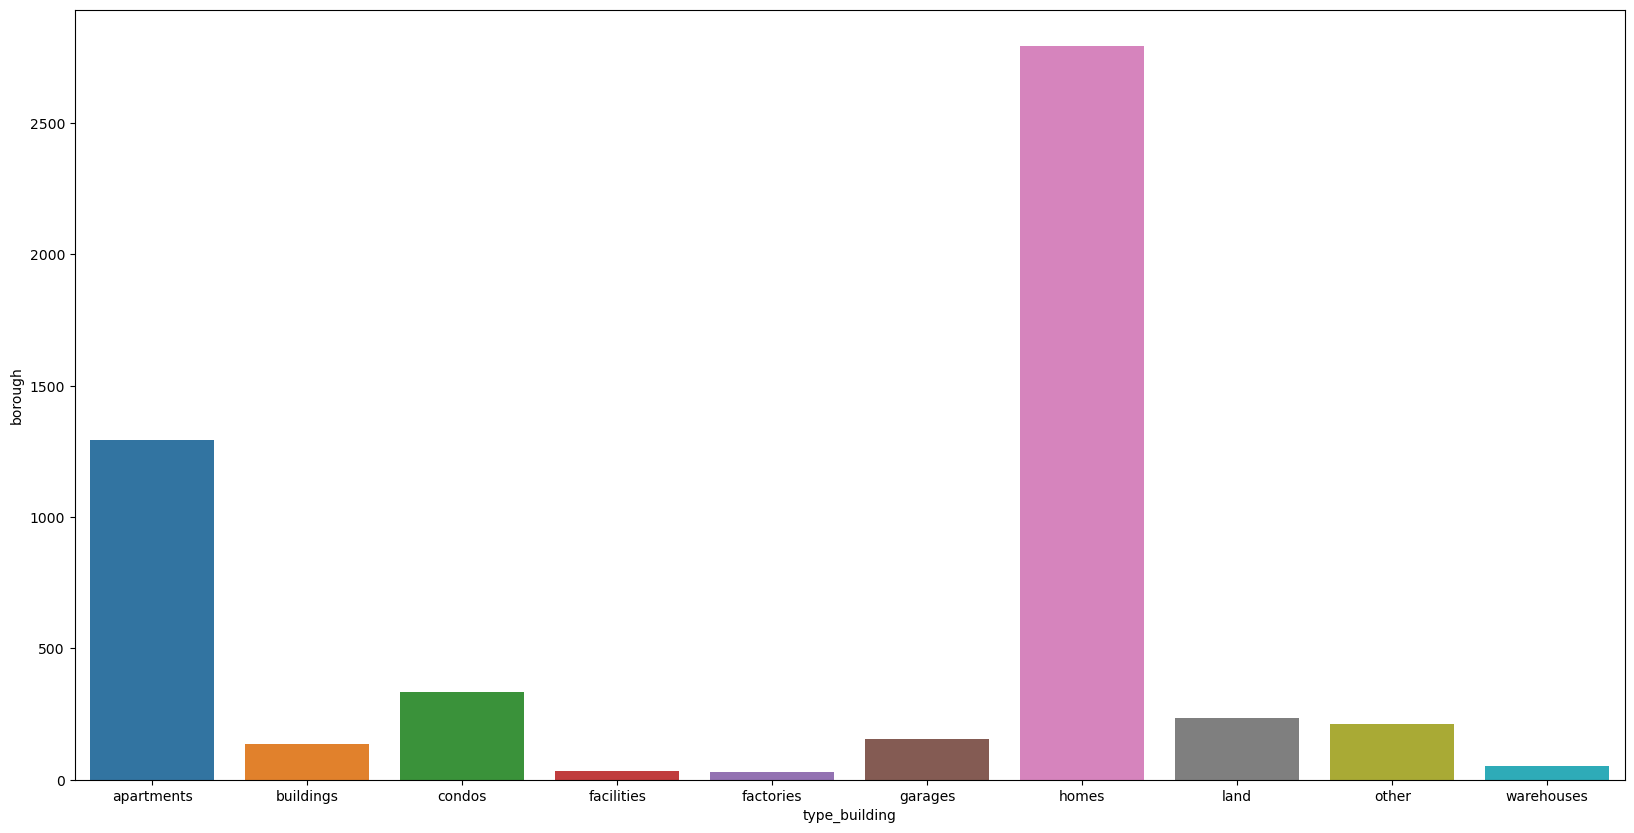

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.barplot( data=grouped_type_build_data, 
                x=grouped_type_build_data.type_building, 
                y=grouped_type_build_data.borough)

<AxesSubplot:xlabel='date', ylabel='saleprice'>

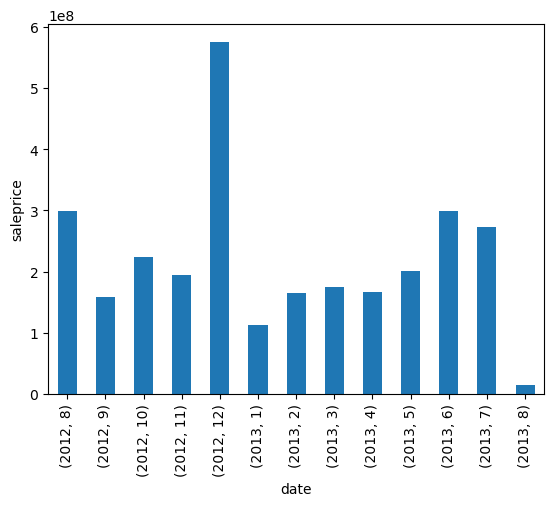

In [8]:
#group_data_by_year = clean_data.groupby("sale_date",as_index=False)
#group_data_by_year
group_data_by_year = clean_data.groupby([clean_data["sale_date"].dt.year, clean_data["sale_date"].dt.month],group_keys=True)["saleprice"].sum()
group_data_by_year.plot(kind = "bar", xlabel="date", ylabel="saleprice")

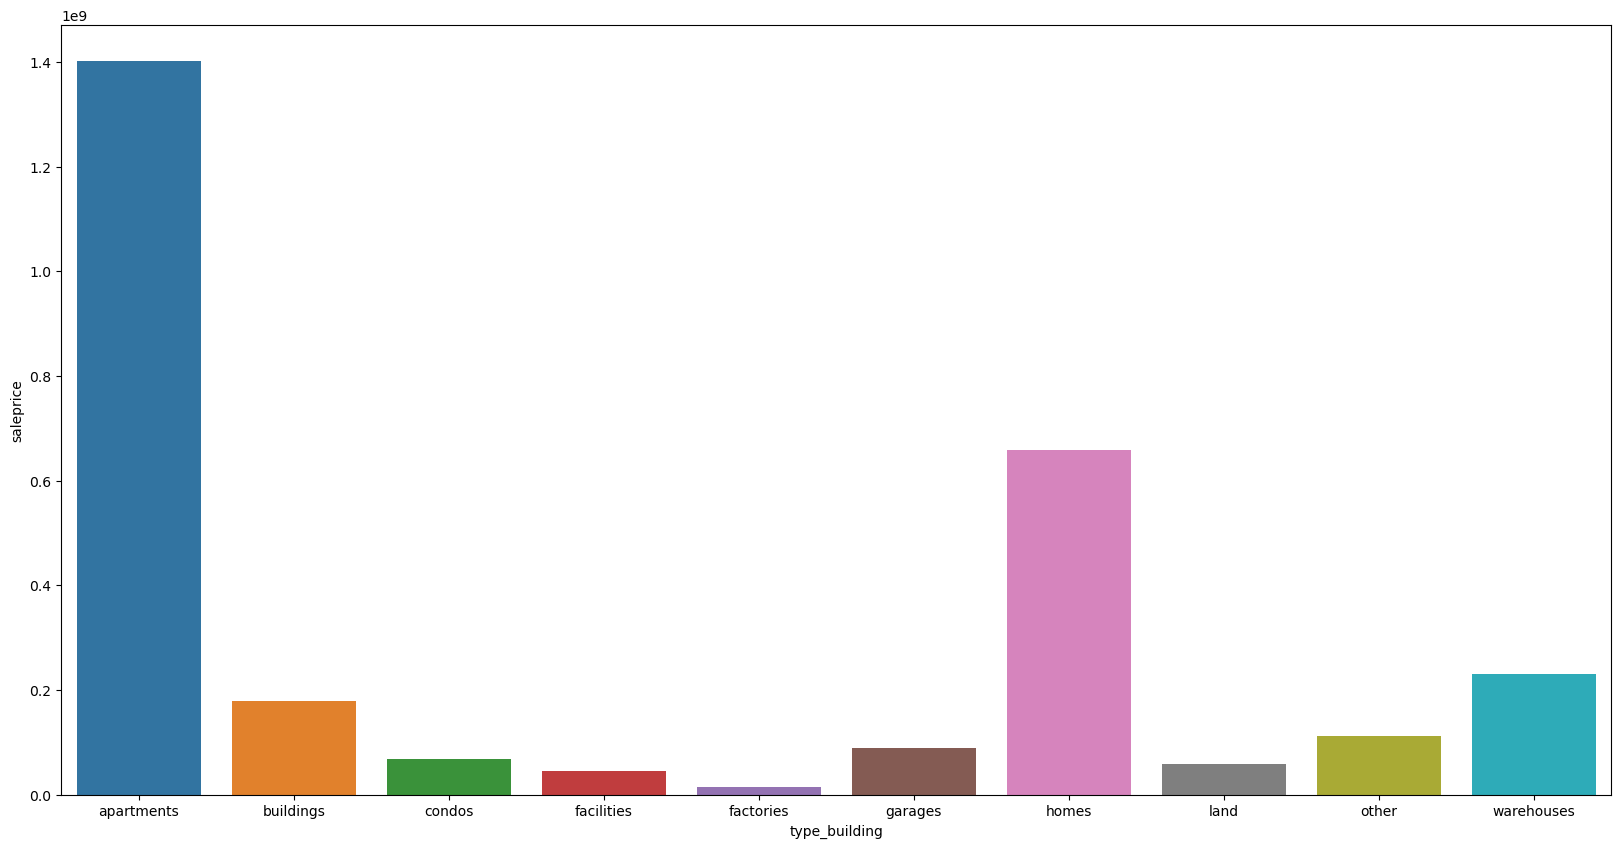

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
group2 = clean_data.groupby(["type_building"],as_index=False).sum()
ax = seaborn.barplot(data=group2, 
                x=group2.type_building, 
                y=group2.saleprice)